In [58]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [59]:
reg_train_data = pd.read_csv('/content/Salary_dataset.csv')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

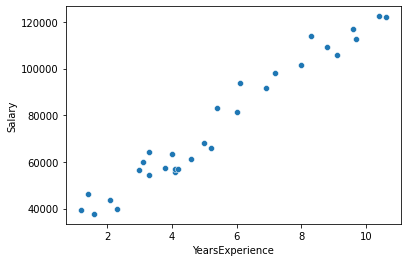

In [60]:
sns.scatterplot(data=reg_train_data , x='YearsExperience',y='Salary')

In [61]:
def zscore_normalisation(X):
  mean = np.mean(X)
  std = np.std(X)
  X = (X-mean)/std
  return X

In [62]:
def mean_normalisation(X):
  mean = np.mean(X)
  max = np.max(X)
  min = np.min(X)
  X = (X - mean)/(max-min)
  return X

In [63]:
def compute_cost(x,y,w,b):
  '''this function computes cost for the dataset x and y 
  given parameters w and b for linear regression with one feature'''
  m = x.shape[0]
  sum = np.sum(w*x + b - y)
  cost = (sum**2)/(2*m)
  return cost

In [64]:
def mse_class(x0,x1,y,w0,w1,b):
  m=x0.shape[0]
  z_pred = x0*w0 + x1*w1 + b
  y_pred = 1/(1+np.exp(-z_pred))
  sum = np.sum(y_pred - y)
  cost = (sum**2)/(2*m)
  return cost

In [65]:
def logloss_class(x0,x1,y,w0,w1,b):
  m=x0.shape[0]
  z_pred = x0*w0 + x1*w1 + b
  y_pred = 1/(1+np.exp(-z_pred))
  log_y_equal_0 = np.log(1-y_pred)
  log_y_equal_1 = np.log(y_pred)
  term1 = np.dot(y,log_y_equal_1)
  term2 = np.dot(1-y,log_y_equal_0) 
  cost  = -(term1+term2)/m
  return cost

In [66]:
def compute_gradient(x_train,y_train , w , b):
  '''Calculate gradient of the loss function with respect to other parameters'''
  m = x_train.shape[0]
  dl_dw_sum = w*np.dot(x_train,x_train) + np.sum(b*x_train) - np.dot(x_train,y_train);
  dl_dw = dl_dw_sum/m
  dl_db_sum = np.sum(w*x_train+b-y_train)
  dl_db = dl_db_sum/m;
  return dl_dw,dl_db

In [67]:
def compute_gradient_log(x0,x1,y,w0,w1,b):
  m = x0.shape[0]
  z_pred = x0*w0 + x1*w1 + b
  y_pred = 1/(1+np.exp(-z_pred))
  dl_dw0_sum = np.dot(x0,y_pred) - np.dot(x0,y)
  dl_dw0 = dl_dw0_sum/m

  dl_dw1_sum = np.dot(x1,y_pred) - np.dot(x1,y)
  dl_dw1 = dl_dw1_sum/m
  
  dl_db_sum = np.sum(y_pred - y)
  dl_db = dl_db_sum/m

  return dl_dw0,dl_dw1,dl_db

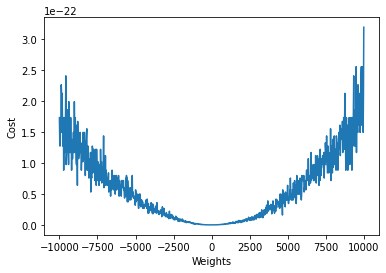

In [68]:
x_train = np.array(reg_train_data['YearsExperience'])
y_train = np.array(reg_train_data['Salary'])

x_train = zscore_normalisation(x_train)
y_train = zscore_normalisation(y_train)

ws = np.linspace(-10000,10000,1000)
ws = np.array(ws)
ys = []
for w in ws:
  ys.append(compute_cost(x_train,y_train,w,0))
costs_weights = np.array(ys)
plt.xlabel('Weights')
plt.ylabel('Cost')
plt.plot(ws,costs_weights)

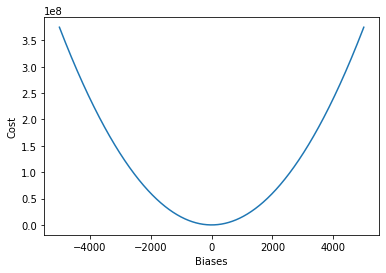

In [69]:
bs = np.linspace(-5000,5000,1000)
bs=np.array(bs)
ys2 = []
for b in bs:
  ys2.append(compute_cost(x_train,y_train,0,b))
costs_biases = np.array(ys2)
plt.xlabel('Biases')
plt.ylabel('Cost')
plt.plot(bs,costs_biases)

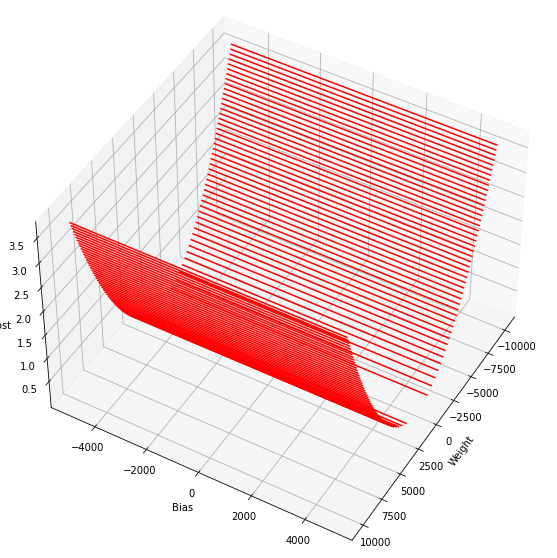

In [70]:
costs2 = np.zeros((len(ws), len(bs)))

for i,w in enumerate(ws):
  for j,b in enumerate(bs):
    costs2[i,j] = compute_cost(x_train,y_train,w,b)

X,Y = np.meshgrid(ws,bs)

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, costs2,50,  colors='red')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Cost');
ax.view_init(45, 30)

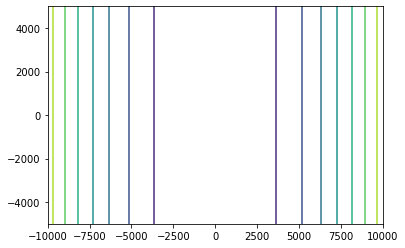

In [71]:
plt.contour(X, Y, costs2)

In [72]:
# Initialising Values of w and b
def gradient_descent(iterations,learning_rate,w_init,b_init,x_train,y_train):
  w = w_init
  b = b_init

  J_history = []
  w_history = []
  b_history = []

  for i in range(iterations):
    loss = compute_cost(x_train, y_train , w,b);
    J_history.append(loss)
    w_history.append(w)
    b_history.append(b)

    descent_w,descent_b = compute_gradient(x_train, y_train , w,b);
    w = w - learning_rate*descent_w
    b = b - learning_rate*descent_b
  return J_history,w,b

Loss is  1.314768175368353e-32


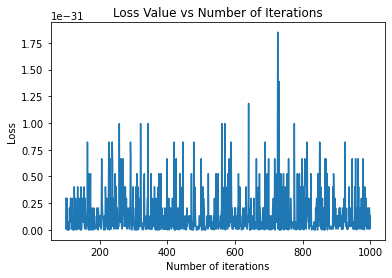

In [95]:
J_history , w,b = gradient_descent(1000,0.000001,0,0,x_train,y_train)
plt.plot(100+np.arange(len(J_history[100:])), J_history[100:])
plt.title("Loss Value vs Number of Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
print("Loss is ",J_history[-1])

In [96]:
# Making Predictions
print(f"Final Values are :- weight {w} and bias {b}")

Final Values are :- weight 0.0009777531493112923 and bias -7.534713593789396e-21


In [75]:
class_train_data = pd.read_csv('/content/Social_Network_Ads.csv')

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

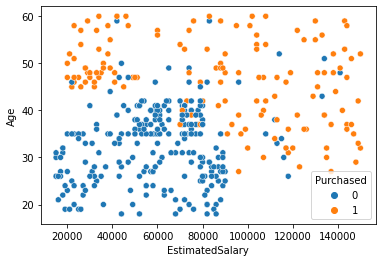

In [76]:
x0_train_cl = zscore_normalisation(np.array(class_train_data['EstimatedSalary']))
x1_train_cl = zscore_normalisation(np.array(class_train_data['Age'])) 

y_train_cl = np.array(class_train_data['Purchased'])

sns.scatterplot(data=class_train_data,x='EstimatedSalary',y='Age',hue='Purchased')

Z = w0*x0 + w1*x1 + b \\
f() = 1/(1+e^(-z))

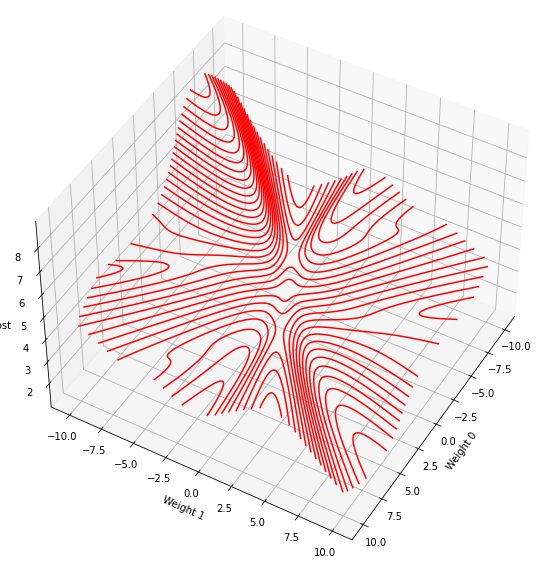

In [77]:
# PLOTTING LOSS VS WEIGHTS WHEH LOSS IS REGRESSION LOSS

w0s = np.linspace(-10,10,1000)
w1s = np.linspace(-10,10,1000)
# bs = np.linspace(-1,1,1000)

costs2 = np.zeros((len(w0s), len(w1s)))

for i,w0 in enumerate(w0s):
  for j,w1 in enumerate(w1s):
    costs2[i,j] = mse_class(x0_train_cl,x1_train_cl,y_train_cl,w0,w1,0)

X,Y = np.meshgrid(w0s,w1s)

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, costs2,50,  colors='red')
ax.set_xlabel('Weight 0')
ax.set_ylabel('Weight 1')
ax.set_zlabel('Cost');
ax.view_init(45, 30)

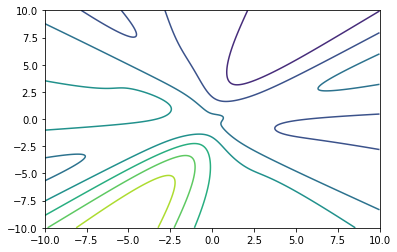

In [78]:
plt.contour(X, Y, costs2)

<ipython-input-65-c6997d53debf>:5: RuntimeWarning: divide by zero encountered in log
  log_y_equal_0 = np.log(1-y_pred)


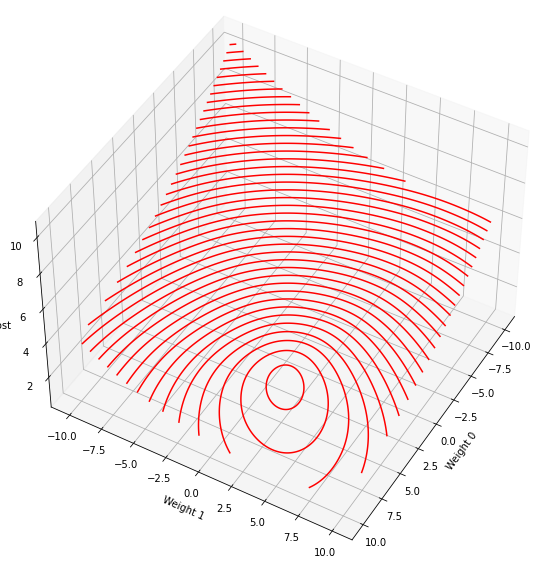

In [79]:
# PLOTTING LOSS VS WEIGHTS WHEH LOSS IS REGRESSION LOSS

w0s = np.linspace(-10,10,1000)
w1s = np.linspace(-10,10,1000)
# bs = np.linspace(-1,1,1000)

costs2 = np.zeros((len(w0s), len(w1s)))

for i,w0 in enumerate(w0s):
  for j,w1 in enumerate(w1s):
    costs2[i,j] = logloss_class(x0_train_cl,x1_train_cl,y_train_cl,w0,w1,0)

X,Y = np.meshgrid(w0s,w1s)

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, costs2,50,  colors='red')
ax.set_xlabel('Weight 0')
ax.set_ylabel('Weight 1')
ax.set_zlabel('Cost');
ax.view_init(45, 30)

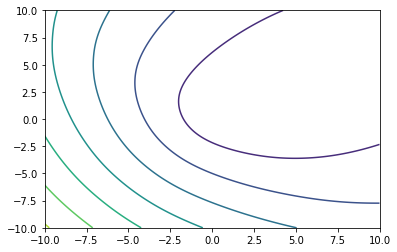

In [80]:
plt.contour(X, Y, costs2)

In [81]:
def gradient_descent_class(iterations,learning_rate,w0_init,w1_init,b_init,x0_train,x1_train,y_train):
  w0 = w0_init
  w1 = w1_init
  b = b_init

  J_history = []
  w0_history = []
  w1_history = []
  b_history = []

  for i in range(iterations):
    loss = logloss_class(x0_train,x1_train,y_train,w0,w1,b)
    J_history.append(loss)
    w0_history.append(w0)
    w1_history.append(w1)
    b_history.append(b)


    descent_w0,descent_w1,descent_b = compute_gradient_log(x0_train,x1_train, y_train , w0,w1,b);
    w0 = w0 - learning_rate*descent_w0
    w1 = w1 - learning_rate*descent_w1
    b = b - learning_rate*descent_b
  return J_history,w0,w1,b

Loss is  0.346396442661211


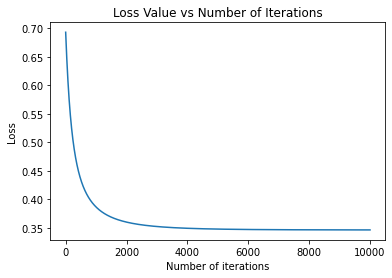

In [82]:
J_history , w0,w1,b = gradient_descent_class(10000,0.01,0,0,0,x0_train_cl,x1_train_cl,y_train_cl)
plt.plot(np.arange(len(J_history)), J_history)
plt.title("Loss Value vs Number of Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
print("Loss is ",J_history[-1])

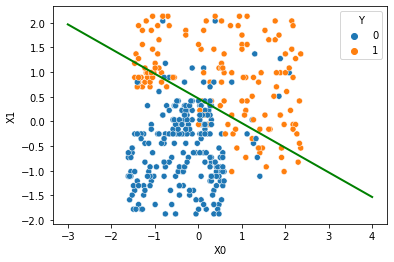

In [83]:
#PLOTTING DESCISION BOUNDARY
dataset = pd.DataFrame({'X0': x0_train_cl, 'X1': x1_train_cl , 'Y':y_train_cl}, columns=['X0', 'X1','Y'])
sns.scatterplot(data=dataset,x='X0',y='X1',hue='Y')

x_plot = np.arange(-3,5)
y_plot = -(w0*x_plot + b)/w1

plt.plot(x_plot,y_plot,color='green',linewidth=2.0)